In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.simplefilter("ignore")

In [57]:
diabetes=pd.read_csv('diabetes2.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [58]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [62]:
x=diabetes.drop(['Outcome'],axis=1)
y=diabetes[['Outcome']]

In [63]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [64]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=101)

In [66]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
361,5,158,70,0,0,29.8,0.207,63
309,2,124,68,28,205,32.9,0.875,30
433,2,139,75,0,0,25.6,0.167,29
211,0,147,85,54,0,42.8,0.375,24
185,7,194,68,28,0,35.9,0.745,41
...,...,...,...,...,...,...,...,...
220,0,177,60,29,478,34.6,1.072,21
116,5,124,74,0,0,34.0,0.220,38
227,3,162,52,38,0,37.2,0.652,24
492,4,99,68,38,0,32.8,0.145,33


In [67]:
y_train

,Outcome
361,0
309,1
433,0
211,0
185,1
...,...
220,1
116,1
227,1
492,0


In [68]:
y_train.value_counts()

Outcome
0          400
1          214
dtype: int64

In [69]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
448,0,104,64,37,64,33.6,0.510,22
690,8,107,80,0,0,24.6,0.856,34
671,1,99,58,10,0,25.4,0.551,21
154,8,188,78,0,0,47.9,0.137,43
662,8,167,106,46,231,37.6,0.165,43
...,...,...,...,...,...,...,...,...
28,13,145,82,19,110,22.2,0.245,57
441,2,83,66,23,50,32.2,0.497,22
395,2,127,58,24,275,27.7,1.600,25
119,4,99,76,15,51,23.2,0.223,21


In [70]:
y_test

,Outcome
448,1
690,0
671,0
154,1
662,1
...,...
28,0
441,0
395,0
119,0


In [71]:
y_test.value_counts()

Outcome
0          100
1           54
dtype: int64

In [72]:
model=LogisticRegression(solver='liblinear')

In [73]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [74]:
predict=model.predict(x_test)

In [75]:
print('accuracy score',accuracy_score(y_test,predict))


accuracy score 0.7662337662337663


In [76]:
y_test.value_counts()

Outcome
0          100
1           54
dtype: int64

In [77]:
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.78      0.90      0.83       100
           1       0.74      0.52      0.61        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



In [78]:
con=confusion_matrix(y_test,predict)
print('confusion matrix',con)


confusion matrix [[90 10]
 [26 28]]


In [79]:
stratified=StratifiedKFold(n_splits=10,shuffle=True,random_state=38)
cross=cross_val_score(model,x,y,cv=stratified,scoring='accuracy')
print('cross validation score',cross.mean())

cross validation score 0.7696172248803828


Text(50.722222222222214, 0.5, 'actual value')

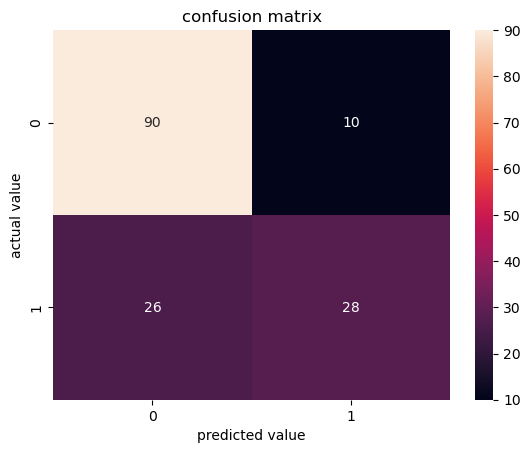

In [80]:
sns.heatmap(con,annot=True)
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('actual value')
